In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from multiclass_helper import generate_dataset, draw_neural_net, plot_MC_boundaries_keras
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import numpy as np

ModuleNotFoundError: No module named 'multiclass_helper'

# Genero dataset

In [ ]:
N = 100
mu_1 = [4, 4]
sigma_1 = [[  2,0.8],
           [0.8,  2]]

mu_2 = [0, 0]
sigma_2 = [[  3,  0],
           [  0,  3]]

mu_3 = [-4, -4]
sigma_3 = [[  2,  0],
           [  0,  2]]

X, y = generate_dataset([[mu_1, sigma_1, N], [mu_2, sigma_2, N],[mu_3, sigma_3, N]])

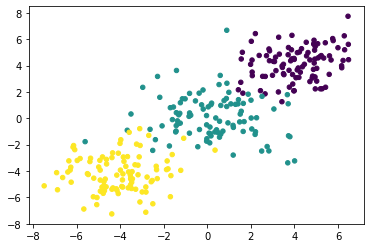

In [ ]:
y_cat = to_categorical(y)
plt.scatter(X[:,0], X[:,1], c=y, s=20)
plt.show()

In [ ]:
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Armamos modelo

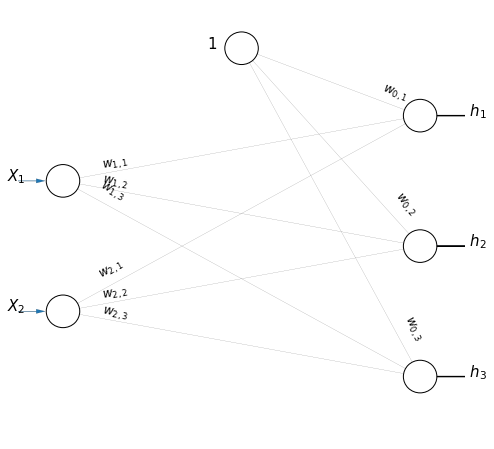

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
biases = [[ '$w_{0,1}$', '$w_{0,2}$', '$w_{0,3}$']]
capa_1 = [['$w_{1,1}$', '$w_{1,2}$', '$w_{1,3}$'],
          ['$w_{2,1}$', '$w_{2,2}$', '$w_{2,3}$'], 
          ['$w_{3,1}$', '$w_{3,2}$', '$w_{3,3}$']]
weights = [np.array(capa_1)]
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, [2,3], weights, biases)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
input_features = 2
output_size = y_cat.shape[1]
model = Sequential()
model.add(Dense(output_size,input_dim=input_features, activation='sigmoid', name="Capa_Oculta"))
model.summary()
lr = 0.04 

# Lo compilo, notar que en vez de binary_crossentropy va categorical_crossentropy
model.compile(loss = 'binary_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_Oculta (Dense)          (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X.shape, y.shape

((300, 2), (300,))

In [ ]:
batch_size = 20
epochs = 10
model.fit(X, 
          y_cat, 
          # batch_size = batch_size,
          epochs=epochs, 
          verbose=1
         )

Epoch 1/10
10/10 [==============================] - 0s 571us/step - loss: 0.2531 - accuracy: 0.9533
Epoch 2/10
10/10 [==============================] - 0s 613us/step - loss: 0.2523 - accuracy: 0.9533
Epoch 3/10
10/10 [==============================] - 0s 728us/step - loss: 0.2556 - accuracy: 0.9567
Epoch 4/10
10/10 [==============================] - 0s 811us/step - loss: 0.2518 - accuracy: 0.9533
Epoch 5/10
10/10 [==============================] - 0s 703us/step - loss: 0.2531 - accuracy: 0.9533
Epoch 6/10
10/10 [==============================] - 0s 980us/step - loss: 0.2521 - accuracy: 0.9533
Epoch 7/10
10/10 [==============================] - 0s 710us/step - loss: 0.2527 - accuracy: 0.9533
Epoch 8/10
10/10 [==============================] - 0s 628us/step - loss: 0.2528 - accuracy: 0.9533
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2528 - accuracy: 0.9533
Epoch 10/10
10/10 [==============================] - 0s 671us/step - loss: 0.2518 - accuracy: 0.9500


10/10 [==============================] - 0s 492us/step - loss: 0.2518 - accuracy: 0.9500


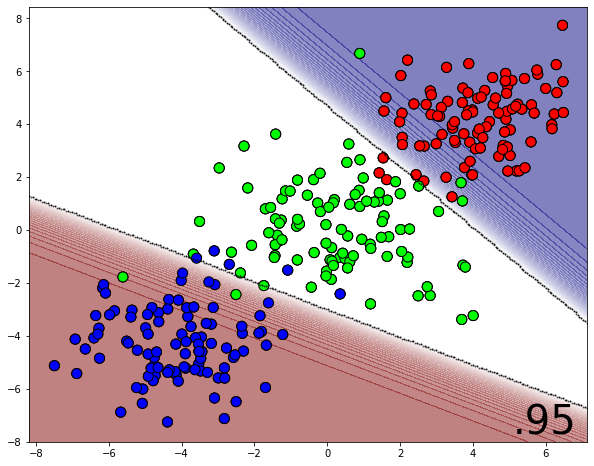

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(10,8))
score = model.evaluate(X, y_cat)
plot_MC_boundaries_keras(X, y_cat, score[1], model.predict_proba, ax=ax1, mesh_res = 300)
plt.show()

# Calculos manuales de h, p y loss

## Que parámetros aprendió el modelo?

In [ ]:
model.get_weights()

[array([[ 0.48761246, -0.2257777 , -0.945587  ],
        [ 1.165164  ,  0.4345558 , -0.73086107]], dtype=float32),
 array([-1.1909837,  1.6851465, -1.8075004], dtype=float32)]

In [ ]:
coefs_, intercept_ = model.get_weights()

In [ ]:
coefs_

array([[ 0.48761246, -0.2257777 , -0.945587  ],
       [ 1.165164  ,  0.4345558 , -0.73086107]], dtype=float32)

In [ ]:
intercept_

array([-1.1909837,  1.6851465, -1.8075004], dtype=float32)

In [ ]:
coefs_ = np.array([
[ 1.2032 , 0.34239826, -0.3272417 ],
[ 1.4500312 , 0.54530275, -0.64213556]
])

In [ ]:
intercept_ = np.array([-1.7683319, 1.8029612, -1.7188473])

## Probabilidad de observación

In [ ]:
observ = np.array([[0, 2]])
print(observ)

[[0 2]]


In [ ]:
probs = model.predict_proba(observ)
probs

array([[0.18277341, 0.81567025, 0.00155635]], dtype=float32)

In [ ]:
# Cálculo de h_i
h_s = coefs_.T.dot(observ.reshape(-1,1)) + intercept_.reshape(-1,1)
h_s

array([[ 1.1317305 ],
       [ 2.8935667 ],
       [-3.00311842]])

In [ ]:
p_ = np.exp(h_s) / np.exp(h_s).sum()
p_

array([[0.14621753],
       [0.85144224],
       [0.00234022]])

## Cálculo de loss

In [ ]:
model.evaluate(observ, np.array([[1, 0, 0]]))

1/1 [==============================] - 0s 701us/step - loss: 1.6995 - accuracy: 0.0000e+00


[1.6995080709457397, 0.0]

In [ ]:
- np.log(0.14621753)

1.9226598346136317

In [ ]:
-np.log(0.14621753), -np.log(0.85144224)

(1.9226598346136317, 0.16082361441563886)

In [ ]:
np.exp(-0.023281602)

0.9769873234479889

In [ ]:
-np.log(0.9769873234479889)

0.023281601999999967